In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#load the data set
#url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df= pd.read_csv("../data/FuelConsumptionCo2.csv")
# verify successful load with some randomly selected records
df.sample()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
388,2014,FORD,F150 FFV 4X4,PICKUP TRUCK - STANDARD,5.0,8,A6,E,22.4,17.0,20.0,14,320


In [3]:
#statistical summary of the data.
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#Select a few features that might be indicative of CO2 emission to explore more
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
93,2.0,4,9.1,209
76,2.0,4,8.4,193
690,4.7,8,15.1,347
609,1.6,4,9.4,216
979,1.8,4,8.2,189
118,4.4,8,14.7,338
102,3.0,6,10.7,246
361,5.4,8,16.0,368
570,3.2,6,10.5,242


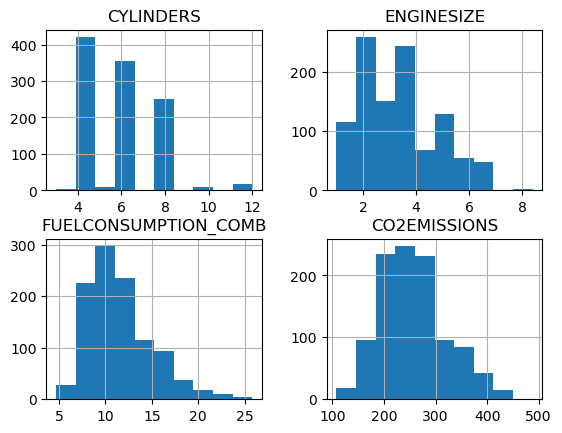

In [11]:
#Visualize features
viz=cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

Text(0, 0.5, 'Emission')

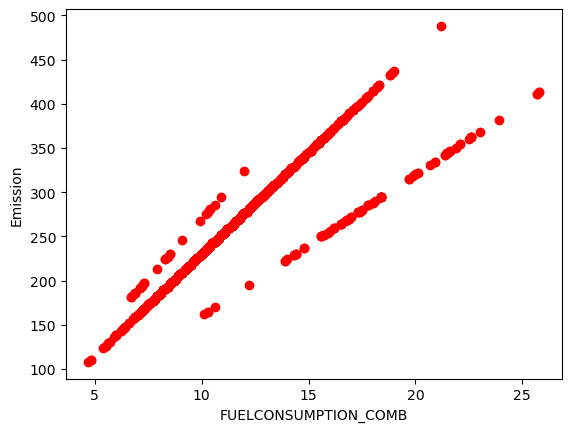

In [16]:
#some scatter plots of these features against the CO2 emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

<b>Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions<b/>

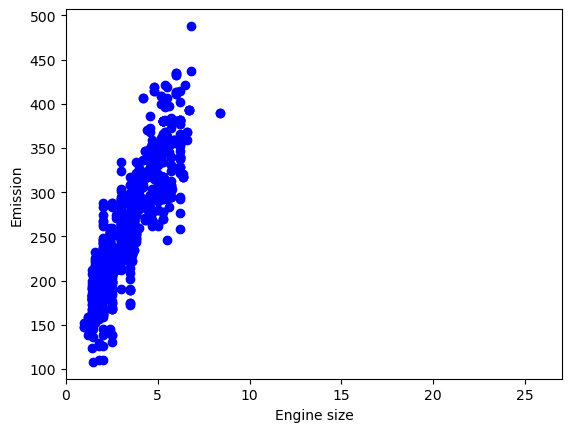

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

<b>Although the relationship between engine size and CO2 emission is quite linear<b/>
<br/>
<b>Their correlation is weaker than that for each of the three fuel consumption groups<b/>

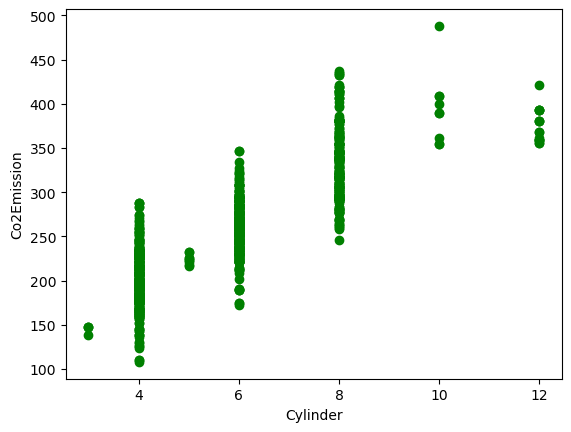

In [25]:
#Plot CYLINDER against CO2 Emission
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='green')
plt.xlabel("Cylinder")
plt.ylabel("Co2Emission")
plt.show()

<b>Extract the input feature and labels from the dataset<b/>

In [27]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

<b>Create train and test datasets<b/>

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
#The outputs are one-dimensional NumPy arrays or vectors.
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

<b>Build a simple linear regression model<b/>

In [32]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434046
Intercept:  126.2897021740873


<b>Visualize model outputs<b/>

Text(0, 0.5, 'Emission')

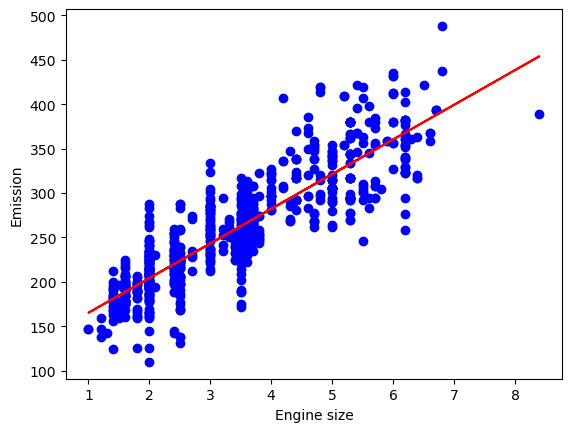

In [33]:
#The regression model is the line given by y = intercept + coefficient * x.

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

<b>Model evaluation<b/>

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Text(0, 0.5, 'Emission')

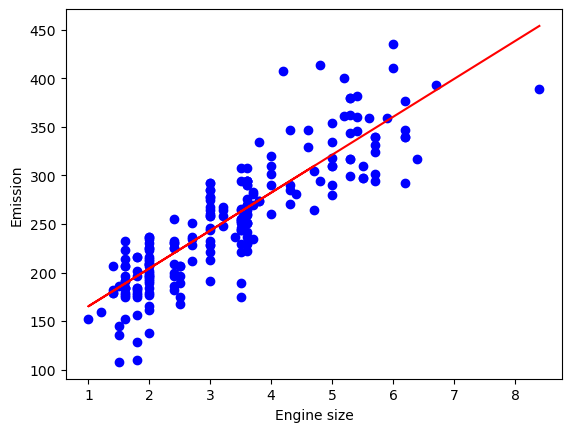

In [35]:
#Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [39]:
#Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets.
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
#Train a linear regression model using the training data
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [44]:
#Use the model to make test predictions on the fuel consumption testing data
y_test=regr.predict(X_test.reshape(-1,1))

In [45]:
#Calculate and print the Mean Squared Error of the test predictions
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))

Mean squared error: 1209.70
